In [50]:
from defs.storage_locs import *
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage

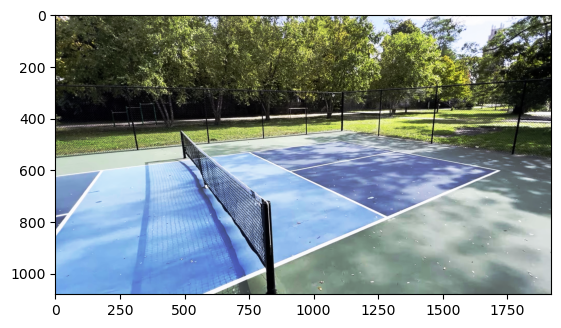

In [99]:
img = cv2.imread('/mnt/f/SeniorProject/court_photos/shady_court.png')
img = cv2.imread(extracted_image_path('center_right_1', 10))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# equalize histogram
img = skimage.exposure.rescale_intensity(img)
img = skimage.exposure.equalize_hist(img)
plt.imshow(img)

In [100]:
img[700, 200, :]

array([0.74464972, 0.87488249, 0.96827369])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


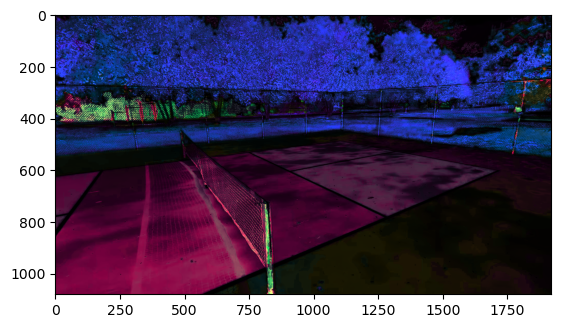

In [101]:
# create binary mask where only white or gray pixels are visible
avg = np.mean(img, axis=2)
diffs = np.abs(img - np.expand_dims(avg, 2))/img
plt.imshow(diffs)

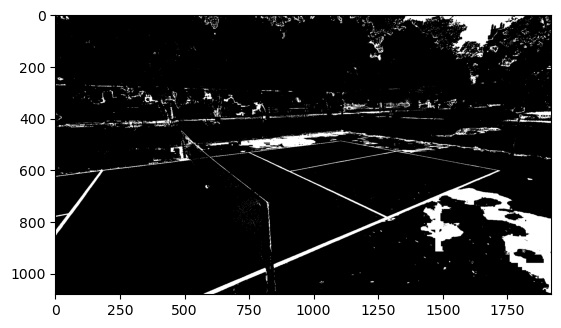

In [102]:
gray = np.mean(diffs, axis=2) < 0.02
plt.imshow(gray, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


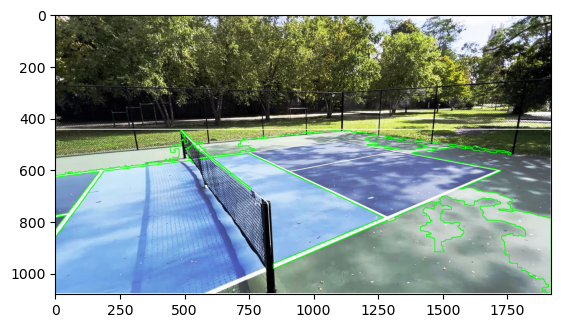

In [103]:
expanded = cv2.dilate(gray.astype(np.uint8), np.ones((5, 5), np.uint8), iterations=1)
plt.imshow(expanded, cmap='gray')
contours = cv2.findContours(expanded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
contours = sorted(contours, key=cv2.contourArea, reverse=True)
contour = contours[0]
# plot contour
copy = img.copy()
cv2.drawContours(copy, [contour], 0, (0,255,0), 2)
x, y, w, h = cv2.boundingRect(contour)
cv2.rectangle(copy, (x, y), (x+w, y+h), (36,255,12), 2)
plt.imshow(copy)


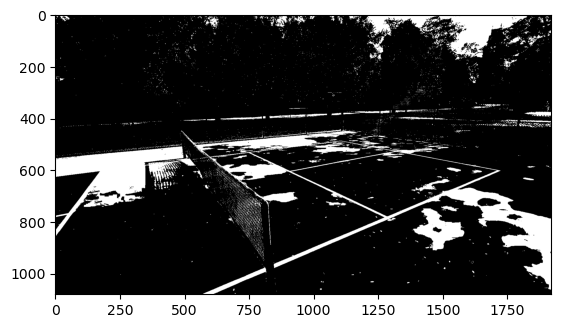

In [104]:
white = np.all(img > 0.75, axis=2)
plt.imshow(white, cmap='gray')

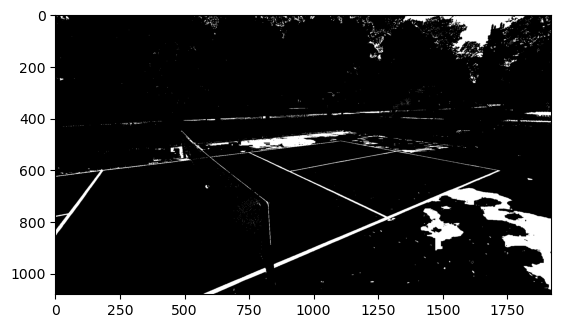

In [105]:
merged = gray * white * 255
plt.imshow(merged, cmap='gray')

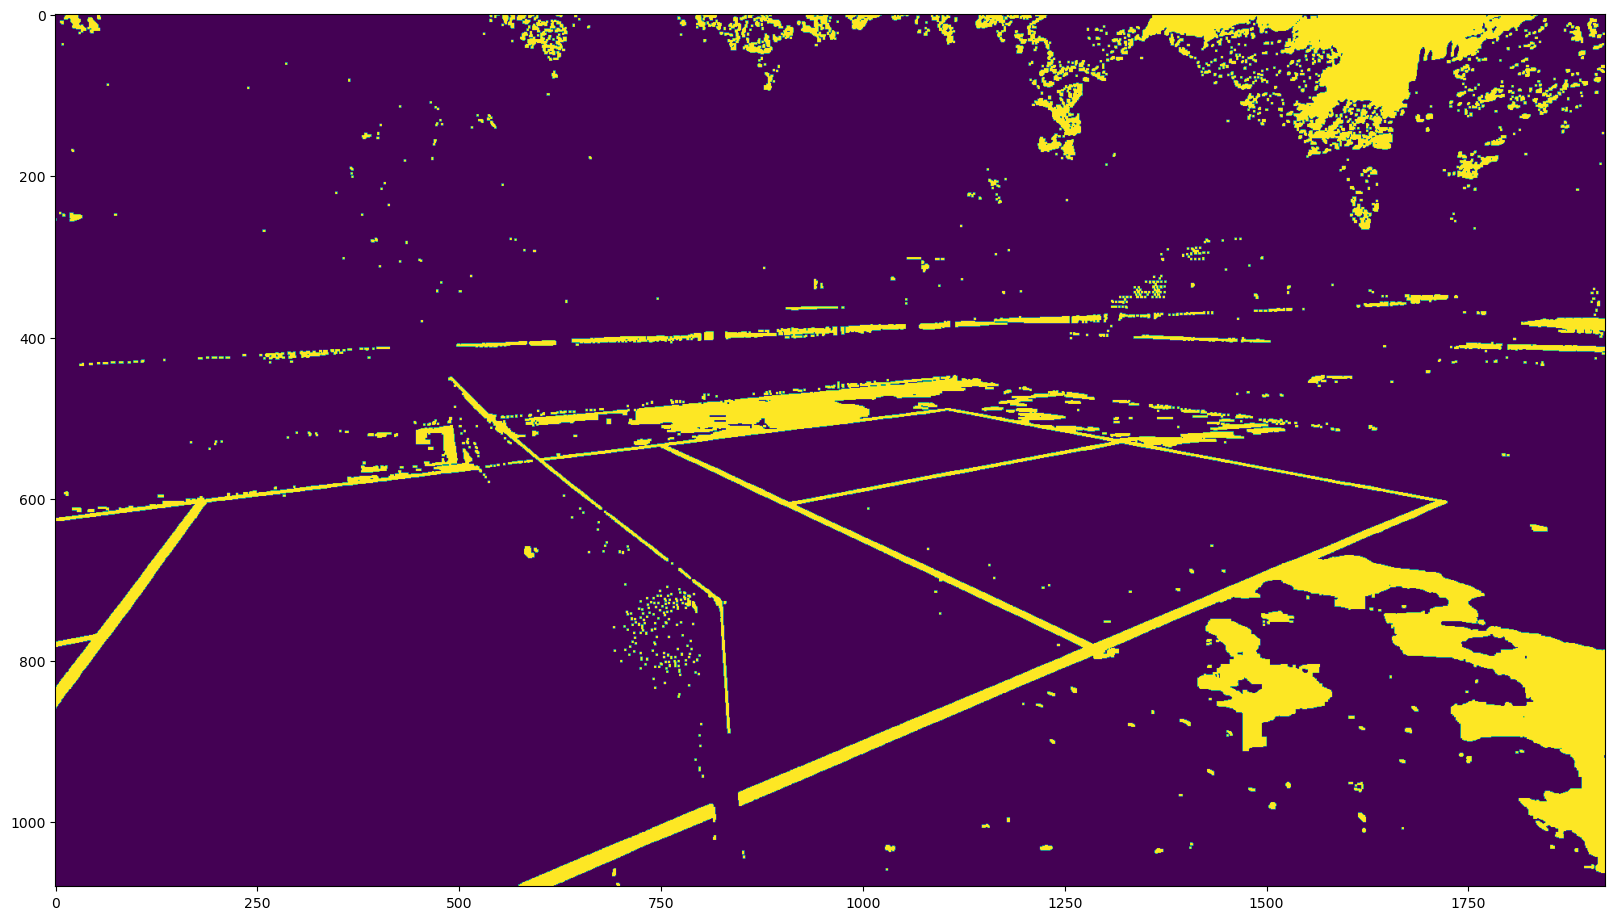

In [106]:
a = cv2.dilate(merged.astype(np.uint8), np.ones((3, 3), np.uint8), iterations=1)
plt.figure(figsize=(20, 20))
plt.imshow(a)

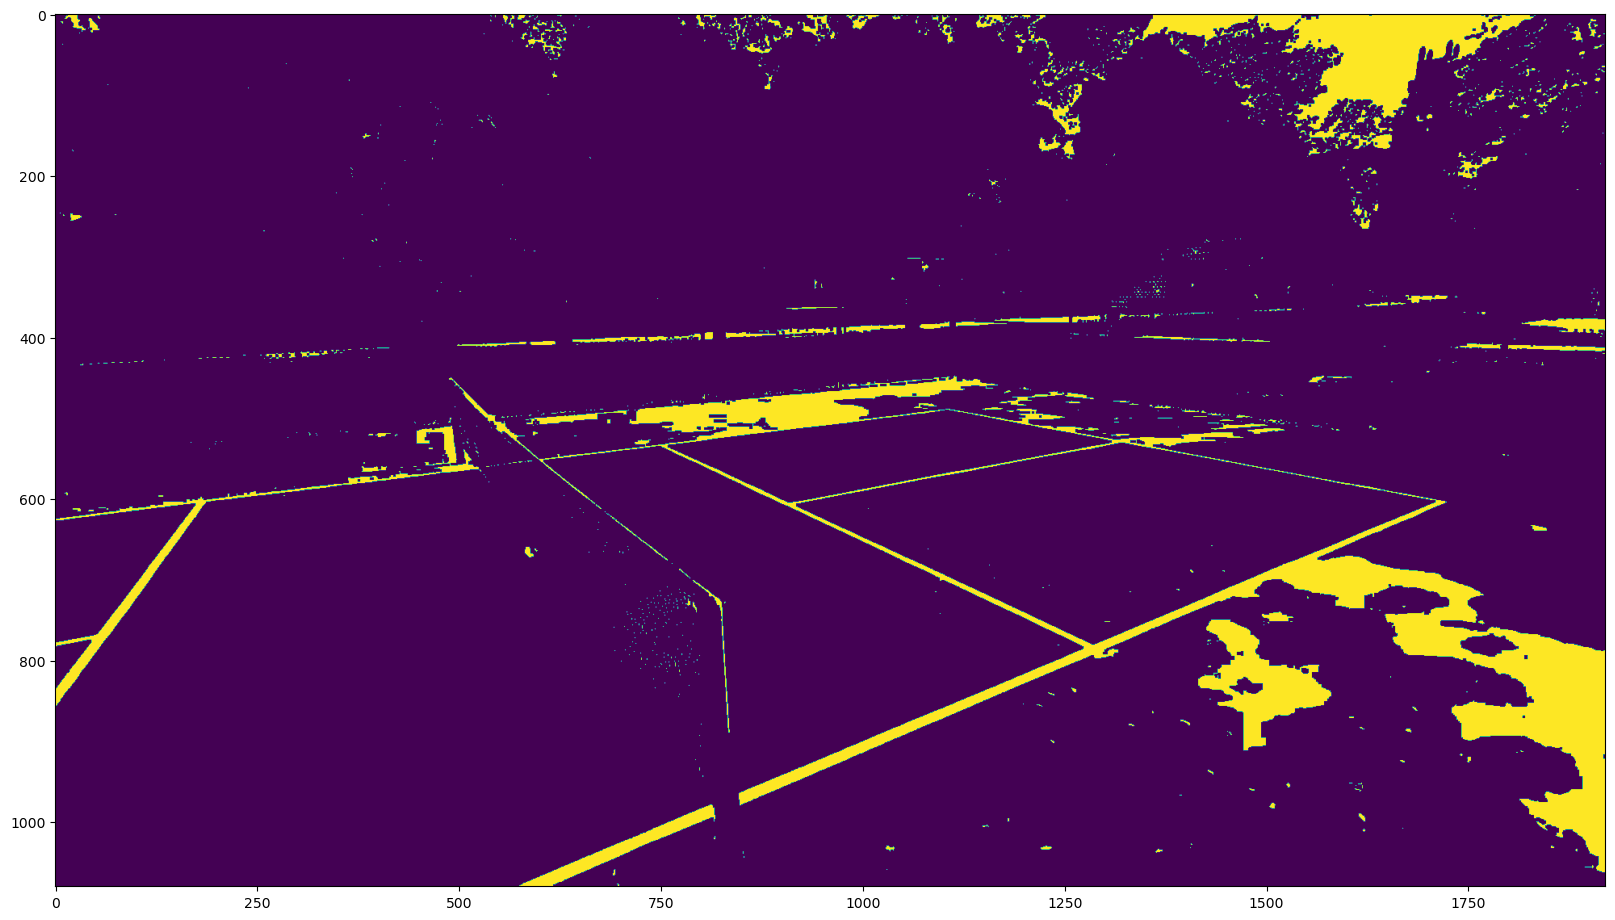

In [107]:
a = cv2.erode(a, np.ones((3, 3), np.uint8), iterations=1)
plt.figure(figsize=(20, 20))
plt.imshow(a)

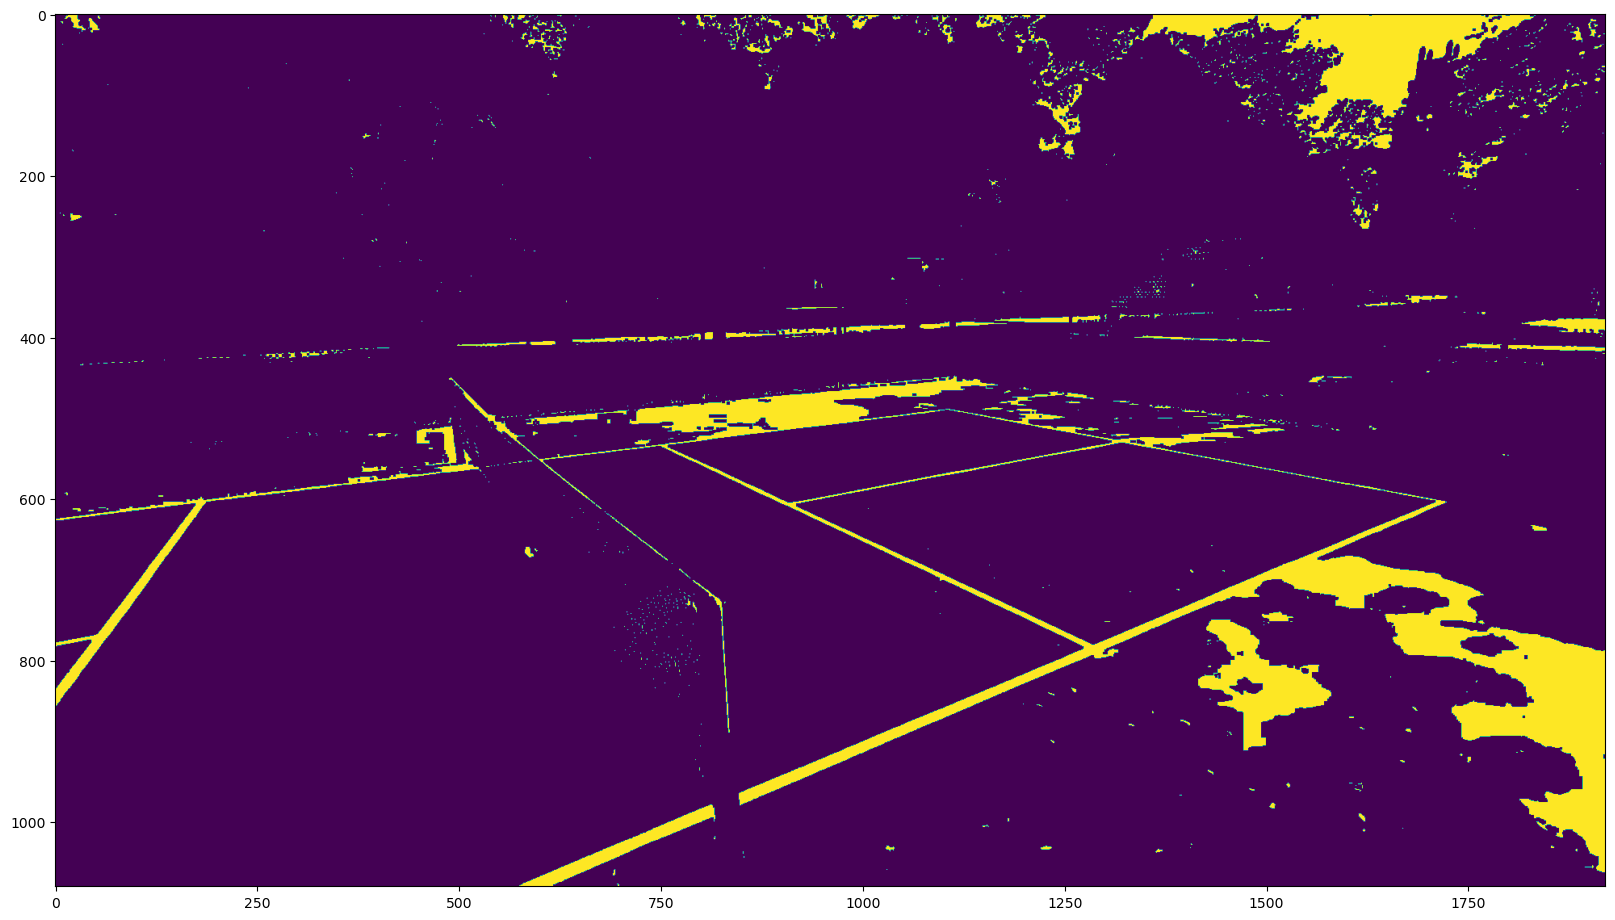

In [108]:
# erode and dilate a few times
a = cv2.dilate(a, np.ones((3, 3), np.uint8), iterations=1)
a = cv2.erode(a, np.ones((3, 3), np.uint8), iterations=1)
a = cv2.dilate(a, np.ones((3, 3), np.uint8), iterations=1)
a = cv2.erode(a, np.ones((3, 3), np.uint8), iterations=1)
a = cv2.dilate(a, np.ones((3, 3), np.uint8), iterations=1)
a = cv2.erode(a, np.ones((3, 3), np.uint8), iterations=1)
a = cv2.dilate(a, np.ones((3, 3), np.uint8), iterations=1)
a = cv2.erode(a, np.ones((3, 3), np.uint8), iterations=1)
a = cv2.dilate(a, np.ones((3, 3), np.uint8), iterations=1)
a = cv2.erode(a, np.ones((3, 3), np.uint8), iterations=1)
plt.figure(figsize=(20, 20))
plt.imshow(a)

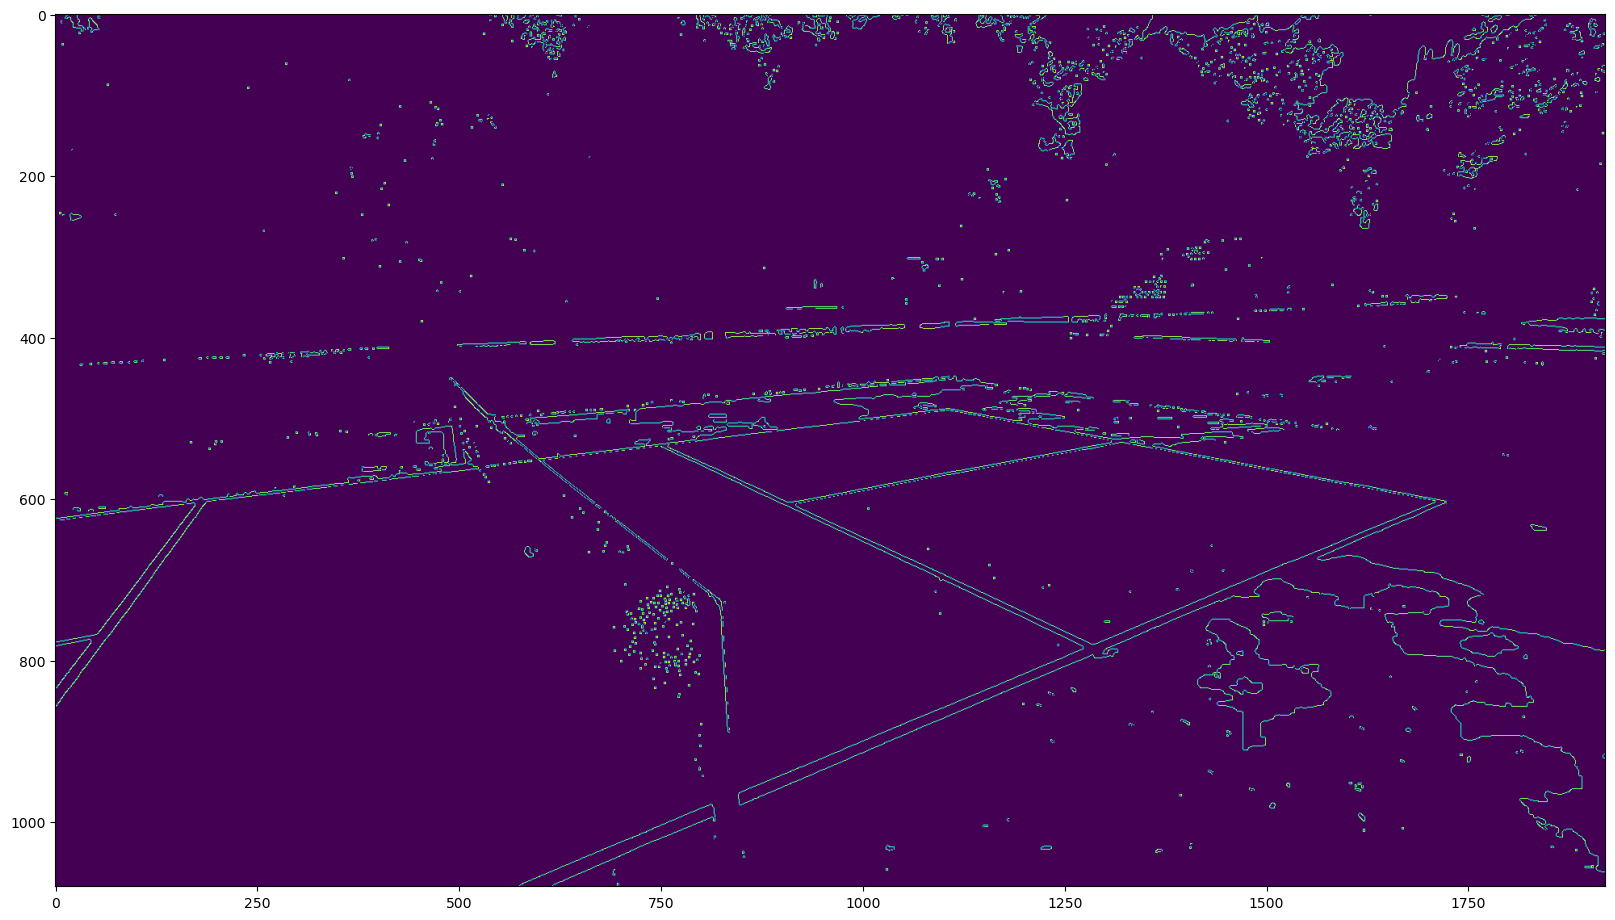

In [109]:
edges = cv2.Canny(a, 100, 200)
plt.figure(figsize=(20, 20))
plt.imshow(edges)

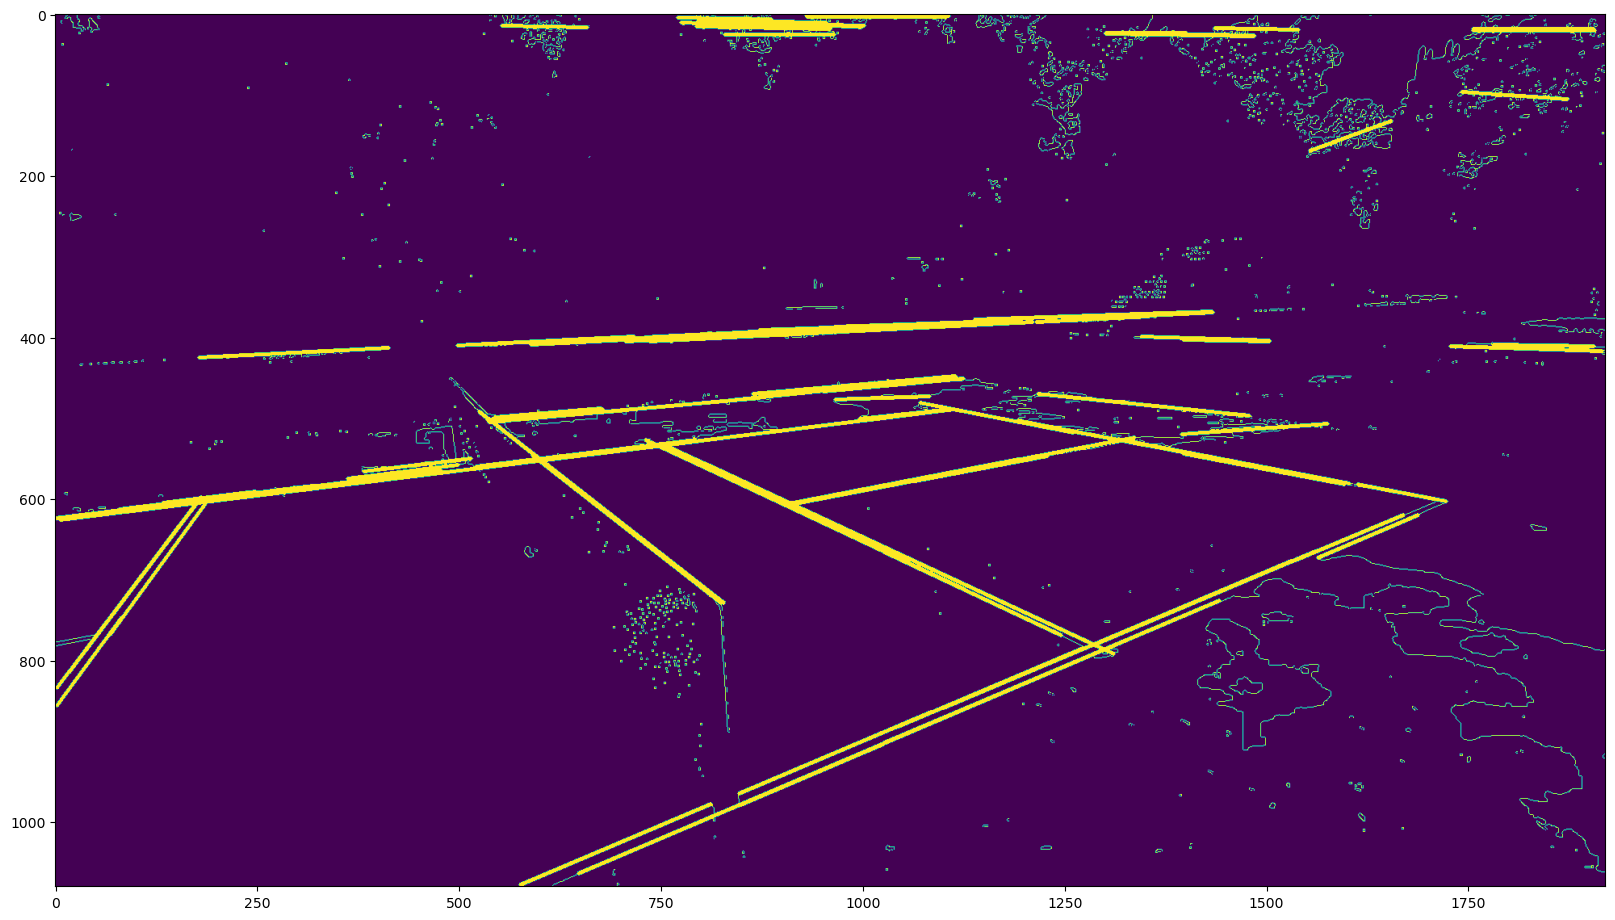

In [110]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=30)
lines = lines.reshape(-1, 4)

# draw lines
copy = edges.copy()
for x1, y1, x2, y2 in lines:
    cv2.line(copy, (x1, y1), (x2, y2), (255, 0, 0), 4)
plt.figure(figsize=(20, 20))
plt.imshow(copy)

In [111]:
# use HoughLines instead
# lines = cv2.HoughLines(edges, 1, np.pi/180, 100)
# copy = edges.copy()
# for line in lines:
#     rho, theta = line[0]
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 1000*(-b))
#     y1 = int(y0 + 1000*(a))
#     x2 = int(x0 - 1000*(-b))
#     y2 = int(y0 - 1000*a)
#     cv2.line(copy, (x1, y1), (x2, y2), (255, 0, 0), 2)
# plt.figure(figsize=(20, 20))
# plt.imshow(copy)
# #BAD